# Exploring the given data

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
# save filepath to variable for easier access
Iowa_file_path = 'C:\Users\mike\Desktop\Business Case&resume\Python_Practice\Kaggle_practice/train.csv'
Iowa_file_path1 = 'C:\Users\mike\Desktop\Business Case&resume\Python_Practice\Kaggle_practice/test.csv'
# read the data and store data in DataFrame titled melbourne_data
Iowa_data = pd.read_csv(Iowa_file_path) 
# print a summary of the data in Melbourne data
print(Iowa_data.describe())


                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000

In [2]:
#print(Iowa_data.columns)
# predicting target - y
y = Iowa_data.SalePrice
# the head command returns the top few lines of data.
print(y.head())

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64


In [3]:
#predictors
Iowa_predictors = ['LotArea','YearBuilt','1stFlrSF','2ndFlrSF','FullBath','BedroomAbvGr','TotRmsAbvGrd']
X=Iowa_data[Iowa_predictors]

# Define model
Iowa_model = DecisionTreeRegressor()

# Fit model
Iowa_model.fit(X, y)

print("Making predictions for the following 5 houses:")
print(X.head())
print("The predictions are")
print(Iowa_model.predict(X.head()))

Making predictions for the following 5 houses:
   LotArea  YearBuilt  1stFlrSF  2ndFlrSF  FullBath  BedroomAbvGr  \
0     8450       2003       856       854         2             3   
1     9600       1976      1262         0         2             3   
2    11250       2001       920       866         2             3   
3     9550       1915       961       756         1             3   
4    14260       2000      1145      1053         2             4   

   TotRmsAbvGrd  
0             8  
1             6  
2             6  
3             7  
4             9  
The predictions are
[ 208500.  181500.  223500.  140000.  250000.]


In [4]:
# split data into training and validation data, for both predictors and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)


# get predicted prices on validation data
val_predictions = Iowa_model.predict(val_X)
print('The MAE is')
print(mean_absolute_error(val_y, val_predictions))

The MAE is
18.2648401826


In [5]:
def get_mae(max_leaf_nodes, predictors_train, predictors_val, targ_train, targ_val):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(predictors_train, targ_train)
    preds_val = model.predict(predictors_val)
    mae = mean_absolute_error(targ_val, preds_val)
    return(mae)

# compare MAE with differing values of max_leaf_nodes
for max_leaf_nodes in [5, 25, 40, 50, 75, 100, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  35190
Max leaf nodes: 25  		 Mean Absolute Error:  28501
Max leaf nodes: 40  		 Mean Absolute Error:  27570
Max leaf nodes: 50  		 Mean Absolute Error:  27825
Max leaf nodes: 75  		 Mean Absolute Error:  27455
Max leaf nodes: 100  		 Mean Absolute Error:  28653
Max leaf nodes: 500  		 Mean Absolute Error:  32662
Max leaf nodes: 5000  		 Mean Absolute Error:  33389


In [6]:
from sklearn.ensemble import RandomForestRegressor
#from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor()
forest_model.fit(train_X, train_y)
melb_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, melb_preds))

23218.8439726


In [7]:
from sklearn.preprocessing import Imputer

Iowa_target = Iowa_data.SalePrice
Iowa_predictors = Iowa_data.drop(['SalePrice'], axis=1)

# For the sake of keeping the example simple, we'll use only numeric predictors. 
Iowa_numeric_predictors = Iowa_predictors.select_dtypes(exclude=['object'])

X_train, X_test, y_train, y_test = train_test_split(Iowa_numeric_predictors, 
                                                    Iowa_target,
                                                    train_size=0.7, 
                                                    test_size=0.3, 
                                                    random_state=0)

def score_dataset(X_train, X_test, y_train, y_test):
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return mean_absolute_error(y_test, preds)
imputed_X_train_plus = X_train.copy()
imputed_X_test_plus = X_test.copy()

cols_with_missing = (col for col in X_train.columns 
                                 if X_train[col].isnull().any())
for col in cols_with_missing:
    imputed_X_train_plus[col + '_was_missing'] = imputed_X_train_plus[col].isnull()
    imputed_X_test_plus[col + '_was_missing'] = imputed_X_test_plus[col].isnull()
print(imputed_X_train_plus.head())

# Imputation
my_imputer = Imputer()
imputed_X_train_plus = my_imputer.fit_transform(imputed_X_train_plus)
imputed_X_test_plus = my_imputer.transform(imputed_X_test_plus)

print("Mean Absolute Error from Imputation while Track What Was Imputed:")
print(score_dataset(imputed_X_train_plus, imputed_X_test_plus, y_train, y_test))

        Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
64      65          60          NaN     9375            7            5   
682    683         120          NaN     2887            6            5   
960    961          20         50.0     7207            5            7   
1384  1385          50         60.0     9060            6            5   
1100  1101          30         60.0     8400            2            5   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
64         1997          1998       573.0         739   
682        1996          1997         0.0        1003   
960        1958          2008         0.0         696   
1384       1939          1950         0.0         204   
1100       1920          1950         0.0         290   

               ...             EnclosedPorch  3SsnPorch  ScreenPorch  \
64             ...                         0          0            0   
682            ...                         0          0            0

In [8]:
# Read the data
import pandas as pd
train_data = Iowa_data
test_data = pd.read_csv('C:\Users\mike\Desktop\Business Case&resume\Python_Practice\Kaggle_practice/test.csv')

# Drop houses where the target is missing
train_data.dropna(axis=0, subset=['SalePrice'], inplace=True)

target = Iowa_data.SalePrice

# Since missing values isn't the focus of this tutorial, we use the simplest
# possible approach, which drops these columns. 
# For more detail (and a better approach) to missing values, see
# https://www.kaggle.com/dansbecker/handling-missing-values
cols_with_missing = [col for col in train_data.columns 
                                 if train_data[col].isnull().any()]                                  
candidate_train_predictors = train_data.drop(['Id', 'SalePrice'] + cols_with_missing, axis=1)
candidate_test_predictors = test_data.drop(['Id'] + cols_with_missing, axis=1)

# "cardinality" means the number of unique values in a column.
# We use it as our only way to select categorical columns here. This is convenient, though
# a little arbitrary.
low_cardinality_cols = [cname for cname in candidate_train_predictors.columns if 
                                candidate_train_predictors[cname].nunique() < 10 and
                                candidate_train_predictors[cname].dtype == "object"]
numeric_cols = [cname for cname in candidate_train_predictors.columns if 
                                candidate_train_predictors[cname].dtype in ['int64', 'float64']]
my_cols = low_cardinality_cols + numeric_cols
train_predictors = candidate_train_predictors[my_cols]
test_predictors = candidate_test_predictors[my_cols]

In [96]:
train_predictors.dtypes.sample(10)
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
one_hot_encoded_training_predictors = pd.get_dummies(train_predictors)
one_hot_encoded_test_predictors = pd.get_dummies(test_predictors)
final_train, final_test = one_hot_encoded_training_predictors.align(one_hot_encoded_test_predictors,
                                                                    join='left', 
                                                                    axis=1)
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

def get_mae(X, y):
    # multiple by -1 to make positive MAE score instead of neg value returned as sklearn convention
    return -1 * cross_val_score(RandomForestRegressor(50), 
                                X, y, 
                                scoring = 'neg_mean_absolute_error').mean()

predictors_without_categoricals = train_predictors.select_dtypes(exclude=['object'])

mae_without_categoricals = get_mae(predictors_without_categoricals, target)

mae_one_hot_encoded = get_mae(one_hot_encoded_training_predictors, target)
#mae_one_hot_encoded = get_mae(one_hot_encoded_training_predictors, target)

print('Mean Absolute Error when Dropping Categoricals: ' + str(int(mae_without_categoricals)))
print('Mean Abslute Error with One-Hot Encoding: ' + str(int(mae_one_hot_encoded)))



Mean Absolute Error when Dropping Categoricals: 18151
Mean Abslute Error with One-Hot Encoding: 18374


In [11]:
train_X, test_X, train_y, test_y = train_test_split(X.as_matrix(), y.as_matrix(), test_size=0.25)

my_imputer = Imputer()
train_X = my_imputer.fit_transform(train_X)
test_X = my_imputer.transform(test_X)


In [38]:


from xgboost import XGBRegressor

#my_model = XGBRegressor()
my_model = XGBRegressor(n_estimators=1000, learning_rate=0.045)
my_model.fit(train_X, train_y, early_stopping_rounds=5, 
             eval_set=[(test_X, test_y)], verbose=False)
# Add silent=True to avoid printing out updates with each cycle
#my_model.fit(train_X, train_y, verbose=False)
predictions = my_model.predict(test_X)

#from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, test_y)))

Mean Absolute Error : 21350.3563784


In [32]:
 my_model = XGBRegressor()
#my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
#my_model.fit(train_X, train_y, early_stopping_rounds=5, 
#             eval_set=[(test_X, test_y)], verbose=False)
# Add silent=True to avoid printing out updates with each cycle
my_model.fit(train_X, train_y, verbose=False)
predictions = my_model.predict(test_X)

#from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, test_y)))

Mean Absolute Error : 21578.0317851


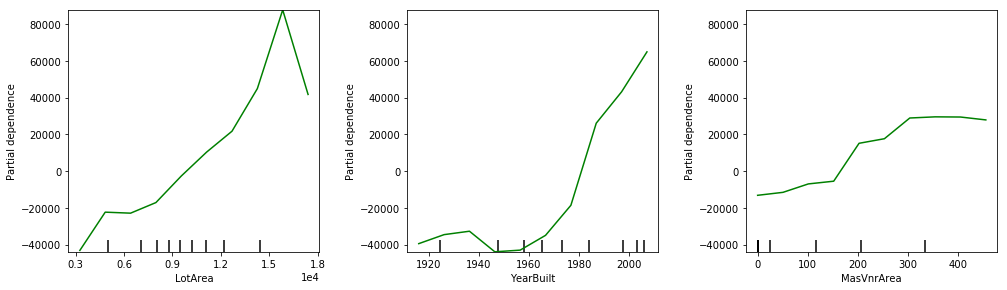

In [93]:
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
def get_some_data():
    cols_to_use = ['LotArea', 'YearBuilt', 'MasVnrArea']
#    data = pd.read_csv('../input/melbourne-housing-snapshot/melb_data.csv')
    y = Iowa_data.SalePrice
    X = Iowa_data[cols_to_use]
    my_imputer = Imputer()
    imputed_X = my_imputer.fit_transform(X)
    return imputed_X, y
# get_some_data is defined in hidden cell above.
X, y = get_some_data()
# scikit-learn originally implemented partial dependence plots only for Gradient Boosting models
# this was due to an implementation detail, and a future release will support all model types.
my_model = GradientBoostingRegressor()
# fit the model as usual
my_model.fit(X, y)
# Here we make the plot
my_plots = plot_partial_dependence(my_model,       
                                   features=[0,1,2], # column numbers of plots we want to show
                                   X=X,            # raw predictors data.
                                   feature_names=['LotArea', 'YearBuilt', 'MasVnrArea'],grid_resolution=10) 

#my_plots=plt.figure()
#plt.figure(figsize=(12, 6))
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=2.25, hspace=0.25,
                    wspace=0.35)
plt.show()

In [99]:
from sklearn.pipeline import make_pipeline

one_hot_encoded_training_predictors = pd.get_dummies(train_predictors)
one_hot_encoded_test_predictors = pd.get_dummies(test_predictors)
final_train, final_test = one_hot_encoded_training_predictors.align(one_hot_encoded_test_predictors,
                                                                    join='left', 
                                                                    axis=1)
train_X, test_X, train_y, test_y = train_test_split(final_train, y)

my_pipeline = make_pipeline(Imputer(), RandomForestRegressor())
my_pipeline.fit(train_X, train_y)
predictions = my_pipeline.predict(test_X)


In [112]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(my_pipeline, X, y, scoring='neg_mean_absolute_error')
print(scores)
print('Mean Absolute Error %2f' %(scores.mean()))

[-35483.83241909 -36764.85982204 -36350.76173329]
Mean Absolute Error -36199.817991


In [113]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(my_pipeline, X, y, scoring='neg_mean_absolute_error')
print(scores)
print('Mean Absolute Error %2f' %(-1 * scores.mean()))

[-35260.08184463 -36336.22665493 -36034.05809573]
Mean Absolute Error 35876.788865


In [115]:
from sklearn.ensemble import RandomForestClassifier
modeling_pipeline = make_pipeline(RandomForestClassifier())
cv_scores = cross_val_score(modeling_pipeline, X, y, scoring='accuracy')
print("Cross-val accuracy: %f" %cv_scores.mean())

C:\Users\mike\Anaconda2\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Cross-val accuracy: 0.013340


In [118]:
# import package with helper functions 
#import bq_helper

# create a helper object for this dataset
#open_aq = bq_helper.BigQueryHelper(active_project="bigquery-public-data",
                                   dataset_name="openaq")

# print all the tables in this dataset (there's only one!)
#open_aq.list_tables()


ImportError: No module named google.cloud